## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/PozisyonSeviyeMaas.csv")

# Veri Keşfi

In [3]:
df.head()

,Pozisyon,Seviye,Maas
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Pozisyon    10 non-null object
Seviye      10 non-null int64
Maas        10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


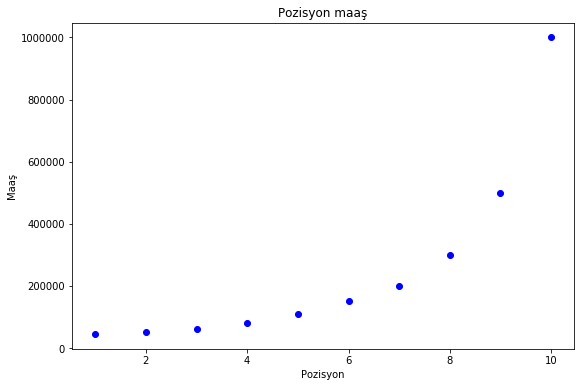

In [5]:
plt.figure(figsize=(9,6))
plt.scatter(df['Seviye'], df['Maas'], color='blue')
plt.title("Pozisyon maaş")
plt.xlabel("Pozisyon")
plt.ylabel("Maaş")
plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [6]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [7]:
print(X.shape)
print(y.shape)

(10, 1)
(10,)


# Polinom Regresyon için Ön Hazırlık

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [9]:
X_poly.shape

(10, 3)

In [10]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

# Polinom Lineer Regresyon ile Modeli Eğitmek

In [11]:
from sklearn.linear_model import LinearRegression
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Polinom Regresyon Modelin Grafiğini Çizmek

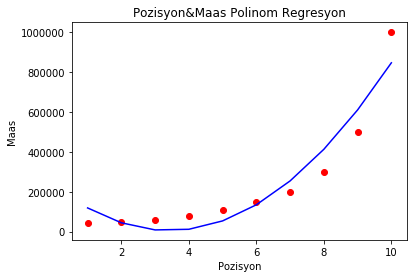

In [12]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pozisyon&Maas Polinom Regresyon')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

# Tahmin Yapma

In [13]:
# Tahmin edilecek veri hazırlığı 
deger = 6.7
tahmin_edilecek_pozisyon = poly_reg.fit_transform(np.array(deger).reshape(-1, 1))

In [14]:
lin_reg_2.predict(tahmin_edilecek_pozisyon)

array([214223.86363636])

# Veri Seti ile tahmin yapma

In [15]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))

In [16]:
y_pred

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [17]:
y_test = y.copy()

In [18]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,118727.272727,45000
1,44151.515152,50000
2,8439.393939,60000
3,11590.909091,80000
4,53606.060606,110000
5,134484.848485,150000
6,254227.272727,200000
7,412833.333333,300000
8,610303.030303,500000
9,846636.363636,1000000


In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_true=y_test, y_pred=y_pred)

0.9162082221443942

# Ödev

In [26]:
# PozisyonSeviyeMaas.csv 
# veri seti ile basit doğrusal regresyon yapınız.
# Sonuçları polinom regresyon ile karşılaştırınız

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/PozisyonSeviyeMaas.csv")

In [22]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("Katsayılar: ",regressor.coef_)
print("Sabit: ",regressor.intercept_)
print("Model parametreleri: ", regressor.get_params())

Katsayılar:  [80878.78787879]
Sabit:  -195333.33333333337
Model parametreleri:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [25]:
y_pred = regressor.predict(X)

In [26]:
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [27]:
y_test = y.copy()
y_test

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [28]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,-114454.545455,45000
1,-33575.757576,50000
2,47303.030303,60000
3,128181.818182,80000
4,209060.606061,110000
5,289939.393939,150000
6,370818.181818,200000
7,451696.969697,300000
8,532575.757576,500000
9,613454.545455,1000000


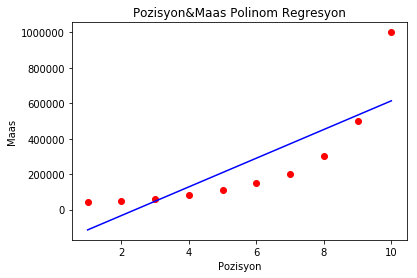

In [29]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Pozisyon&Maas Polinom Regresyon')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_pred=y_pred, y_true=y_test)

0.6690412331929895